In [18]:
import pandas as pd
df=pd.read_csv('house_rental_data.csv.txt',index_col=0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [19]:
print(df.shape)

(645, 7)


In [20]:
print(df.dtypes)

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object


In [26]:
print(df.describe())

              Sqft       Floor  TotalFloor     Bedroom  Living.Room  \
count   645.000000  645.000000  645.000000  645.000000   645.000000   
mean   1527.656260    5.939535   10.855814    2.837209     1.813953   
std     767.386531    3.884721    4.996208    1.010740     0.462364   
min     359.358000    1.000000    1.000000    1.000000     0.000000   
25%     925.080000    3.000000    7.000000    2.000000     2.000000   
50%    1423.200000    5.000000   12.000000    3.000000     2.000000   
75%    1892.856000    8.000000   14.000000    4.000000     2.000000   
max    5856.468000   22.000000   38.000000    7.000000     4.000000   

         Bathroom          Price  
count  645.000000     645.000000  
mean     1.810853   61986.823256  
std      0.683574   35635.091007  
min      0.000000    6100.000000  
25%      1.000000   39000.000000  
50%      2.000000   50000.000000  
75%      2.000000   75000.000000  
max      5.000000  250000.000000  


In [22]:
print(df.isnull().sum())

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64


Data Visualisation

In [28]:
import seaborn as sns
df.head()


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


<AxesSubplot:xlabel='Floor', ylabel='count'>

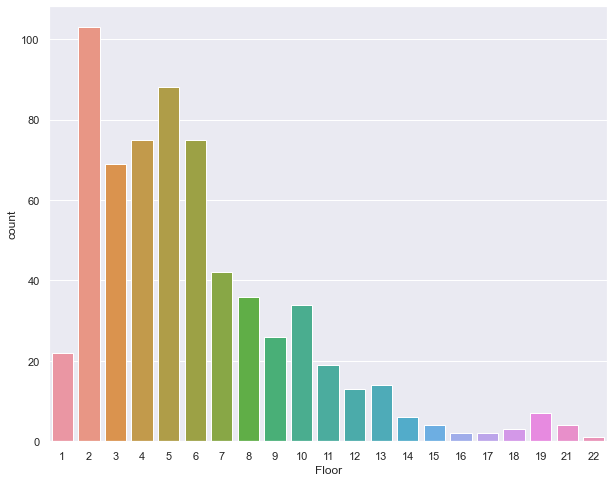

In [46]:
#countplot of floor
sns.countplot(x='Floor',data=df)

<AxesSubplot:xlabel='Bedroom', ylabel='Count'>

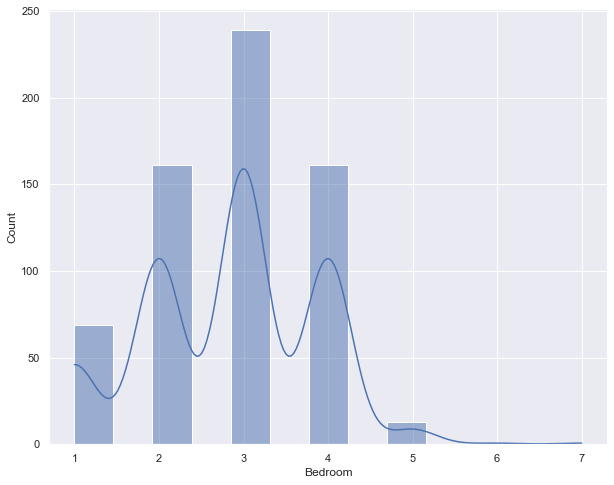

In [47]:
#Density plot
sns.histplot(x=df['Bedroom'],kde=True)

c:\Users\91805\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

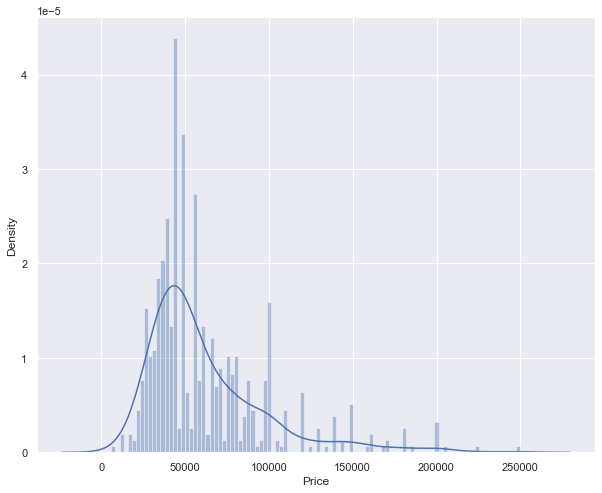

In [45]:
#distplot of price
sns.set(rc={'figure.figsize' : (10,8)})
sns.distplot(df['Price'],bins=100)

In [30]:
#Top 10 by highest price
df.sort_values(['Price'],ascending=False).head(10)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
289,3504.630,13,14,2,2,2,250000
149,4981.200,3,38,3,2,3,225000
303,3664.740,9,13,5,1,2,206000
27,3664.740,19,19,3,2,3,200000
39,3735.900,19,19,3,2,3,200000
49,3735.900,19,19,3,2,3,200000
473,3842.640,15,16,3,1,2,200000
25,3664.740,19,19,3,2,3,200000
439,3010.068,4,11,3,2,2,185000
166,4091.700,2,15,3,2,4,180000


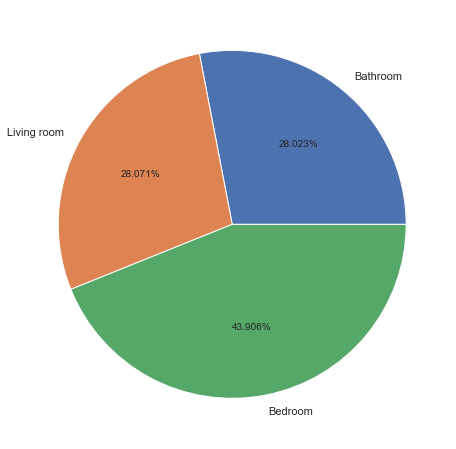

In [56]:
#piechart of total rooms types
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.pie([df['Bathroom'].sum(),df['Living.Room'].sum(),df['Bedroom'].sum()],labels=['Bathroom','Living room','Bedroom'],autopct='%1.3f%%')

plt.show()

Training and testing data

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


In [58]:
x=df.drop('Price',axis=1)
y=df['Price']

In [59]:
scalar=MinMaxScaler()
x=scalar.fit_transform(x)

In [60]:
x

array([[0.14886731, 0.04761905, 0.16216216, 0.16666667, 0.5       ,
        0.4       ],
       [0.32297735, 0.19047619, 0.16216216, 0.5       , 0.5       ,
        0.4       ],
       [0.14174757, 0.19047619, 0.16216216, 0.16666667, 0.5       ,
        0.2       ],
       ...,
       [0.06925566, 0.57142857, 0.35135135, 0.        , 0.25      ,
        0.2       ],
       [0.24530744, 0.0952381 , 0.35135135, 0.33333333, 0.5       ,
        0.4       ],
       [0.18511327, 0.23809524, 0.16216216, 0.33333333, 0.5       ,
        0.2       ]])

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=1)

In [63]:
k_range=range(1,50)
k_scores=[]
for k in k_range:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score=mean_squared_error(y_test,y_pred)
    k_scores.append(score)


In [68]:
print(k_scores)

[439394800.5670103, 411752258.66752577, 365027994.9553265, 397402538.7712629, 395577421.42721653, 386422808.67668957, 376613879.64780134, 387589301.5802191, 395246490.3072419, 394786457.9702062, 393311927.69063646, 391011428.7876575, 407130712.667114, 422940871.87208086, 433258776.37392896, 413719949.7061856, 405203994.38704383, 407413380.9419307, 410286142.7520061, 413758951.8997938, 413934903.2485448, 419177688.4441936, 433355065.2697172, 445093944.1685996, 449080126.46875054, 448850889.5042244, 453651367.0361178, 458514109.5181202, 464836134.95978034, 468380835.4873883, 480161290.8369182, 482159658.02637726, 485344792.2521087, 485931820.2548247, 484141502.1375551, 488724129.6284364, 495963924.31000125, 500059214.07618445, 502999793.53729564, 504305488.0089562, 510564236.2585661, 514144611.0847009, 516142969.94189674, 518568384.33054656, 521747503.7654779, 523022042.2118371, 521154948.99117947, 520232081.6941582, 521347296.64213365]


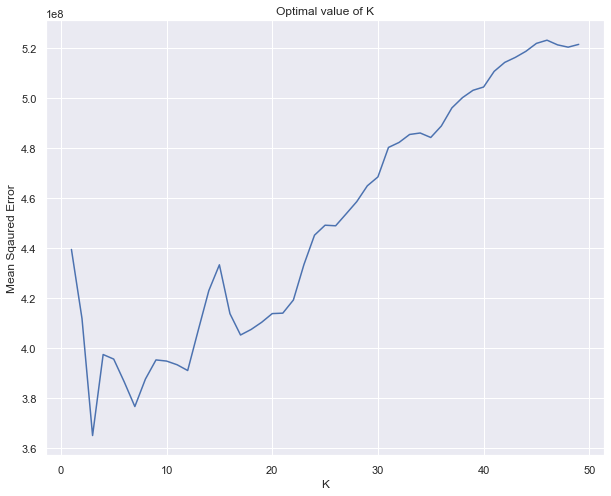

In [67]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(k_range,k_scores)
plt.title('Optimal value of K')
plt.xlabel('K')
plt.ylabel('Mean Sqaured Error')
plt.show()

In [ ]:
k=3